<a href="https://colab.research.google.com/github/sushii-00/DanielBourke_DL_Course/blob/main/Predict_health_insurance_FirstDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#LET'S TRY ONE-HOT ENCODING ON OUR DATAFRAME SO IT'S ALL NUMBERS
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


###1. Create X and Y values (features and labels)

In [ ]:

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

###view X and y

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

###Create training and test sets

In [ ]:
#we are going to use a function to split our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(y), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1338, 1070, 268, 1070, 268)

###Build a neural network (sort of like model_2 above)

In [ ]:
# Setting random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7520.6838 - mae: 7520.68

###X_train and all the others that we built using pandas will be automatically executed by tensorflow, because, pandas is built on top of numpy and tensorflow knows how to handle numpy arrays

In [ ]:
#check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

###right now it looks like our model isn't performing that great. So' we must change it.

To(try) improve our model, we'll run 2 experiments,
1. ADD AN EXTRA LAYER with more hidden units; adam()
2. Train for longer
3.(Insert your own experiments here)


In [ ]:
#set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

#2.compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.7184 - mae:

In [ ]:
#evaluate the model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# we decreased the error by 2000 from th earlier model

In [ ]:
#set seed
tf.random.set_seed(42)

#build 
insurance_model_3= tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

#compile
insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit
history = insurance_model_3.fit(X_train,y_train,epochs=300)


Epoch 1/300
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/300
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


[3215.86083984375, 3215.86083984375]

In [ ]:
# in this the error decreased by another 1k

In [ ]:
#we also made a 'history' variable in model 3.
#this is used to draw a LOSS CURVE

Text(0.5, 0, 'epochs')

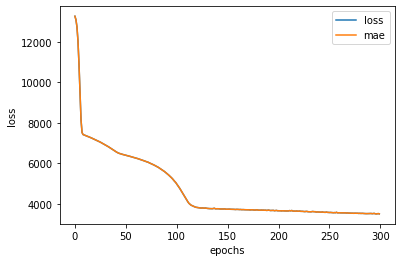

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###this shows that our model, when it first started to learn , it started at around about 13k and then it decreased to 3k.

#data preprocessing

### NORMALISATION

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


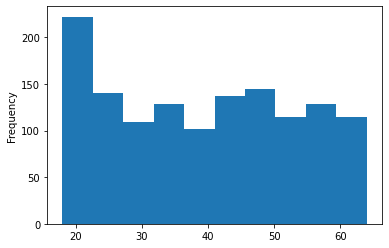

In [ ]:
X["age"].plot(kind="hist")  #this means that age=20 occurs more than about 200 times in our dataset

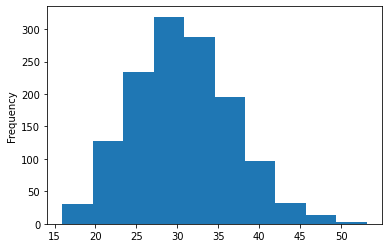

In [ ]:
X["bmi"].plot(kind="hist") #this meansthat bmi=30 occurs about 300 times in the whole dataset

In [ ]:
X["children"].value_counts()  #574 people with 0 children, 324 people with 1 child, so on...

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

###the scales of these feature are VERY different. what if we get them all between 0 and 1? 
That is **normalisation**

that can be done, by **FEATURE SCALING** THAT IS, CHANGE THE SCALE WHILST PRESERVING THE DISTRIBUTION OF THE FEATURES.

### in TERMS OF SCALING VALUES, NEURAL NETWORKS TEND TO PREFER NORMALISATION
IF YOU'RE NOT SURE ON WHICH ONE TO USE, YOU COULD TRY BOTH AND SEE WHICH PERFORMS BETTER
(BTW, **NORMALISATION** & **STANDARDISATION**)

###Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.

In [2]:
# FEATURE SCALING: NORMALISATION
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read the dataframe from URL: we are just reinstantiating everything
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from scikit-learn

In [3]:
from  sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),  #turn all valus in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X and y
X =insurance.drop("charges", axis=1)
y = insurance["charges"]

#build our train and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalisation (MinMaxScaler) and OnehhotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
 

In [5]:
#this is what our data looked like before (for the first person)
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [6]:
# what does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [7]:
X_train.shape, X_train_normal.shape #some extra columns have been added

((1070, 6), (1070, 11))

Beautiful! Our data has been normalised and one hot encoded. Now, let's build a neural network model on it.

In [17]:
# set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

# compile the model
insurance_model_4.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

#fit the model
insurance_model_4.fit(X_train_normal,y_train, epochs=300)


Epoch 1/300
34/34 [==============================] - 0s 1ms/step - loss: 13254.8789 - mae: 13254.8789
Epoch 2/300
34/34 [==============================] - 0s 1ms/step - loss: 11784.7705 - mae: 11784.7705
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 7911.8880 - mae: 7911.8880
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 7968.5020 - mae: 7968.5020
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7328.0949 - mae: 7328.0949
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6783.2004 - mae: 6783.2004
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 5888.1695 - mae: 5888.1695
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 4855.4473 - mae: 4855.4473
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 3780.6063 - mae: 3780.6063
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3722.8480 - mae: 3722.

In [16]:
# evaluate our insurance model trained on normalised data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.5093 - mae: 3162.5093


[3162.50927734375, 3162.50927734375]

our best performing model before this was model 2. so we remade it, but with normalised data.
and this one performed better 